In [1]:
from preprocessing import *
from main import *
import torch
import os
import shutil
if os.path.exists('model'):
    shutil.rmtree("model")

In [2]:
# set your device and visible devices, prefer cuda
os.environ["CUDA_VISIBLE_DEVICES"]="2"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'DEVICE: {device}')

# set your parameters based on hyperparameter tuning results
chf_mini_params = {'depth': 1, 'grid': 8, 'k': 8, 'lamb': 3.3619635794339965e-07, 'lamb_entropy': 2.078997799175118, 'lr_1': 1.25, 'lr_2': 1.25, 'steps': 20}

# load your dataset from preprocessing
dataset = get_chf(cuda=True)

# define your NKAN object
chf_kan = NKAN(dataset, 42, device, chf_mini_params)

DEVICE: cuda
checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 5.71e-03 | test_loss: 4.97e-03 | reg: 1.45e+01 | : 100%|█| 20/20 [00:07<00:00,  2.57it


saving model version 0.1
Model trained.
saving model version 0.2


| train_loss: 5.58e-03 | test_loss: 4.93e-03 | reg: 1.33e+01 | : 100%|█| 20/20 [00:06<00:00,  2.86it


saving model version 0.3
Model pruned and re-trained.


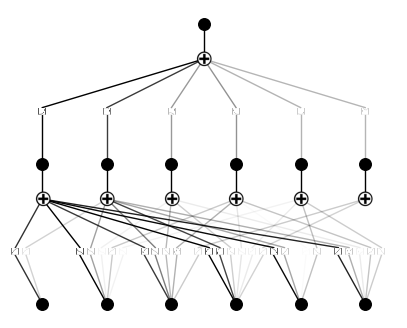

In [3]:
# initialize and train your model
model = chf_kan.get_model(save=True, save_as='CHF_mini')
model.plot()

In [4]:
chf_kan.get_metrics(model, 'CHF_mini')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,CHF,42.5389,3.2291,4241.9198,65.13,5.3519,0.9976


In [5]:
# do a quick refinement loop on your model 
#model = KAN.loadckpt('models/CHF_mini')
#chf_kan.refine(model, grids=[50])

In [6]:
chf_kan.get_equation(model, 'CHF_mini_s0', simple=0, metrics=True)

fixing (0,0,0) with tan, r2=0.9993847066269874, c=3
fixing (0,0,1) with arctanh, r2=0.9711389119144458, c=4
fixing (0,0,2) with 0
fixing (0,0,3) with 0
fixing (0,0,4) with 0
fixing (0,0,5) with 0
fixing (0,1,0) with tan, r2=0.9996045165352689, c=3
fixing (0,1,1) with x^3, r2=0.9940010782161919, c=3
fixing (0,1,2) with tan, r2=0.9962389010594564, c=3
fixing (0,1,3) with arctan, r2=0.9906561565711614, c=4
fixing (0,1,4) with cos, r2=0.568692525668296, c=2
fixing (0,1,5) with 0
fixing (0,2,0) with arctan, r2=0.976859885129152, c=4
fixing (0,2,1) with tan, r2=0.9985994630540637, c=3
fixing (0,2,2) with abs, r2=0.9956417081502624, c=3
fixing (0,2,3) with sin, r2=0.9287192723721951, c=2
fixing (0,2,4) with 0
fixing (0,2,5) with abs, r2=0.9906521019945744, c=3
fixing (0,3,0) with tan, r2=0.9991785269606548, c=3
fixing (0,3,1) with gaussian, r2=0.9869010493756957, c=3
fixing (0,3,2) with gaussian, r2=0.993698385238447, c=3
fixing (0,3,3) with tan, r2=0.9932909667633713, c=3
fixing (0,3,4) with

[-0.0032*(-0.1956*Abs(9.5389*x_3 - 0.6122) - 0.5294*atan(7.3202*x_4 - 2.1919) + 1)**5 + 0.0748*(cos(1.052*x_2 - 9.3926) + 0.5891*tanh(2.3611*x_5 - 0.8141) + 0.3926*atan(3.9561*x_6 - 2.322) + 0.7287 + 0.2047*exp(-40.96*(0.0994 - x_4)**2))**4 + 0.3946*tanh(0.6558*(0.5275 - x_5)**3 + 0.4732*sin(7.7721*x_3 + 5.9957) + 0.1156*tan(2.504*x_4 - 7.5896) - 0.7547*atan(2.976*x_2 - 0.2664) - 0.3149*atan(9.972*x_6 - 7.196) - 2.1076) + 1.6376*tanh(0.5065*log(9.4825 - 8.6746*x_5) + 0.5107*tan(1.0587*x_1 + 1.9991) - 0.4365*tan(2.4914*x_2 + 1.7923) + 0.4097*tan(1.6*x_4 - 1.38) + 0.1603*atan(5.092*x_3 - 2.0542) - 2.5891 + 0.8174*exp(-2.3686*(0.9928 - x_6)**2)) + 2.0188 - 1.0212*exp(-59.1406*(-(0.5 - x_2)**3 + 0.0616*tan(2.1787*x_3 + 5.1948) - 0.017*Abs(8.0478*x_5 - 1.4126) - 0.0825*atanh(0.6*x_1 - 0.956) + 0.2701 + 0.082*exp(-25.9293*(0.5078 - x_6)**2) + 0.2078*exp(-87.7594*(0.0632 - x_4)**2))**2) + 0.0612*exp(-6.3458*(0.069*tan(2.511*x_2 - 1.397) + 0.152*Abs(8.7392*x_3 - 0.5962) + 1 + 0.2235*exp(-45.99

In [ ]:
from sys import getsizeof
getsizeof(formula)

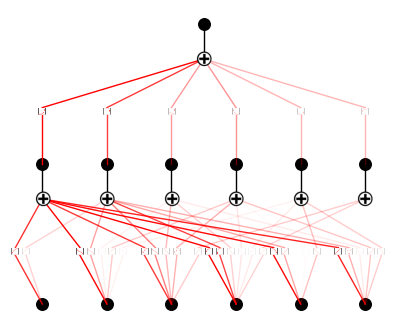

In [11]:
model.plot()